# TMDB Movies Dataset Analysis


## Introduction

**Dataset Description**

This dataset contains information about movies extracted from TMDB. The dataset contains movies from 1960 to 2015. Including user ratings and revenue. Original data from Kaggle.

**Columns Descriptions**
- `id`: A unique identifier for each movie entry.	
- `imdb_id`: The IMDb ID of the movie.
- `popularity`: A numeric measure of the movie's popularity.	
- `budget`: Movie's production budget in USD.	
- `revenue`:  Movie's total revenue in USD.	
- `original_title`:  The original title of the movie.
- `cast`:  A list of actors and actresses in the movie.
- `homepage`:   The official website of the movie.
- `director`: Name(s) of the director(s) of the movie (separated by "|" if there are more than one director).	
- `tagline`:  A short phrase or slogan that summarizes the movie's plot or theme.
- `keywords`: Key themes or topics  associated with the movie.
- `overview`: A brief summary or description of the movie's plot. 	
- `runtime`: Length of the movie in minutes.
- `genres`: Categories or types of movie genres of the movie separated by "|".
- `production_companies`: Companies involved in producing the movie.
- `release_date`:	Date when the movie was released.
- `vote_count`: Number of votes or ratings the movie has received.	
- `vote_average`: Average rating of the movie	
- `release_year`:	Year the movie was released.
- `budget_adj`: Adjusted budget (possibly for inflation).
- `revenue_adj`: Adjusted revenue (possibly for inflation).


**Questions For Analysis:**
- Do movies with high popularity achive high revenue?
- What are the most filmed genres in the whole dataset?
- Is there a correlation between a movie budget and its revenue?

**Environment Setup:**

In [2]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Wrangling**

Load our desired data from csv file using `pandas`to further explore data

In [3]:
# Loading data 
movie_list = pd.read_csv('movies.csv')
movie_list.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06-09-2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04-01-2015,2947,7.3,2015,174799923.1,1.385749e+09


**Data Cleaning**

We dive deeper into exploring our dataser and perform cleaning operations like(dropping columns, handling NaNs and converting datatypes). All of this will help us to reach more accurate result in answering questions.

In [4]:
# Printing dataframe column info
movie_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Taking a look at number of unique values
movie_list.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
movie_list.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# Checking duplicated values
movie_list.duplicated().sum()

1

As we can see from the above output:
- Our dataset consists of a total of 10866 rows and 21 columns.
- We have only 1 duplicated row which would be droped.
- Some columns wont be useful in answering our questions using analysis.
- Few columns have many missing values that needs to be handled.
- Columns `cast` `director` `genre` have values saperated with a '|'.
- `release_date`'s data type needs to be casted.
- We can append a column for the movie `profit` using formula 
.
- `vote_average` better be presented as a catecorical variable that groubs multible ratings values.
- We may also catigorize `profit` column for better EDA

Start dropping the duplicated rows

In [8]:
# Dropping duplicates
movie_list.drop_duplicates(inplace=True)
movie_list.duplicated().sum()

0

Check for dataframe columns

In [9]:
movie_list.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

After going through all the columns, we decided that columns: `id` ,`imdb_id`, `homepage`, `revenue_adj` ,`budget_adj`, `tagline`,`cast`,`overview` ,`keywords`, `production_companies`, `director`, `release_date` will not be very usefull, so we will drop them and continue with our analysis.

In [10]:
# Dropping unuseful columns
movie_list.drop(['id','imdb_id','cast','homepage',	'director',	'tagline','keywords',	'overview',	'production_companies',	'release_date'	,'budget_adj','revenue_adj'], axis=1,inplace=True)

In [11]:
# Check for dataframe shape
movie_list.shape

(10865, 9)

Now we only have 9 columns to start preprocessing on

In [12]:
movie_list.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'vote_count', 'vote_average', 'release_year'],
      dtype='object')

Check for null values


In [13]:
movie_list.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64


We can see that all of our columns are clean except the genre column. Since it is very important to answer our questions, we would drop all its NaNs.

In [14]:
# Dropping null values
movie_list.dropna(inplace=True)
movie_list.isnull().any()

popularity        False
budget            False
revenue           False
original_title    False
runtime           False
genres            False
vote_count        False
vote_average      False
release_year      False
dtype: bool

In [15]:
movie_list['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10842, dtype: object

Dealing with genres column's '|' saperated values

We would do our analysis with the first genre for each movie. We're going to take each hybrid row and extract the first genre (before the '|') and save it to our dataframe.

In [16]:
# Split gener values
movie_list['genres'] = movie_list['genres'].apply(lambda x : x.split('|')[0])
movie_list


,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,95,Documentary,11,7.4,1966
10862,0.065543,0,0,Grand Prix,176,Action,20,5.7,1966
10863,0.065141,0,0,Beregis Avtomobilya,94,Mystery,11,6.5,1966
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,Action,22,5.4,1966


Calculating movie profit. 

In [18]:
# Adding new column for movie profit (revenue - budget)
movie_list['profit'] = movie_list.revenue - movie_list.budget
movie_list

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action,2947,7.3,2015,1316249360
...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,95,Documentary,11,7.4,1966,0
10862,0.065543,0,0,Grand Prix,176,Action,20,5.7,1966,0
10863,0.065141,0,0,Beregis Avtomobilya,94,Mystery,11,6.5,1966,0
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,Action,22,5.4,1966,0


Catigorizing `vote_average` `profit` columns

For usability and functionality sake, we would convert these columns using a function.

In [19]:
def categorize_col(df,col,lablels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']
             ]
    df[col] = pd.cut(df[col], edges, labels= labels, duplicates='drop')
    return df

Converting `vote_average` into a categorical variable

We would cut the `vote_average` values and make 4 categories: `popular`, `average`, `below_avg`, `not_popular` to describe it more using `catigorize_col()` function provided above.

In [20]:
# Define labels for these edges
labels = ['not_popular','below_avg','average','popular']
categorize_col(movie_list,'vote_average',labels)

movie_list['vote_average'].unique()

['average', 'popular', 'below_avg', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [21]:
# Dropping NaNs 
movie_list.dropna(inplace=True)
movie_list.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
profit            0
dtype: int64


Converting `profit` into a categorical variable

We would cut the `profit` values and make 3 categories: `high` `average` `low` to describe it more using `catigorize_col()` function provided above.

In [22]:
# Define labels for these edges
labels = ['low', 'average','high']
categorize_col(movie_list,'profit',labels)
movie_list['profit'].unique()

['high', 'average', 'low', NaN]
Categories (3, object): ['low' < 'average' < 'high']

In [23]:
# Dropping NaNs in profit column 
movie_list.dropna(inplace=True)
movie_list.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
profit            0
dtype: int64

In [28]:
movie_list

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,average,2015,high
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,popular,2015,high
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,average,2015,high
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,popular,2015,high
4,9.335014,190000000,1506249360,Furious 7,137,Action,2947,popular,2015,high
...,...,...,...,...,...,...,...,...,...,...
10860,0.087034,0,0,Carry On Screaming!,87,Comedy,13,popular,1966,low
10861,0.080598,0,0,The Endless Summer,95,Documentary,11,popular,1966,low
10862,0.065543,0,0,Grand Prix,176,Action,20,below_avg,1966,low
10863,0.065141,0,0,Beregis Avtomobilya,94,Mystery,11,average,1966,low


In [26]:
movie_list.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10839 entries, 0 to 10864
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   popularity      10839 non-null  float64 
 1   budget          10839 non-null  int64   
 2   revenue         10839 non-null  int64   
 3   original_title  10839 non-null  object  
 4   runtime         10839 non-null  int64   
 5   genres          10839 non-null  object  
 6   vote_count      10839 non-null  int64   
 7   vote_average    10839 non-null  category
 8   release_year    10839 non-null  int64   
 9   profit          10839 non-null  category
dtypes: category(2), float64(1), int64(5), object(2)
memory usage: 783.6+ KB


After cleaning our dataset consists of 10840 records with 10 columns, it does not have any dupicates or null values, and the datatypes are consistant with suitable categorical variable to address our questions. 

**Exploratory Data Analysis**


Q1: Do movies with high popularity achive high revenue?

In [40]:
# Get average of popularity to compare with
movie_list['popularity'].mean()

0.6476021913460651

In [41]:
# Split popular movies into two groups around the mean
less_popular = movie_list.query('popularity <= 0.647')
more_popular = movie_list.query('popularity >  0.647')

In [42]:
# Get mean quality revenue for the less and more popularity groups
print(less_popular.revenue.mean(), more_popular.revenue.mean())

7689823.871224779 121933819.08567691


From the above calculations, it's clear that more popular movies recieve way more revenue than the less popular movies.

Q2: What are the most filmed genres in the whole dataset?

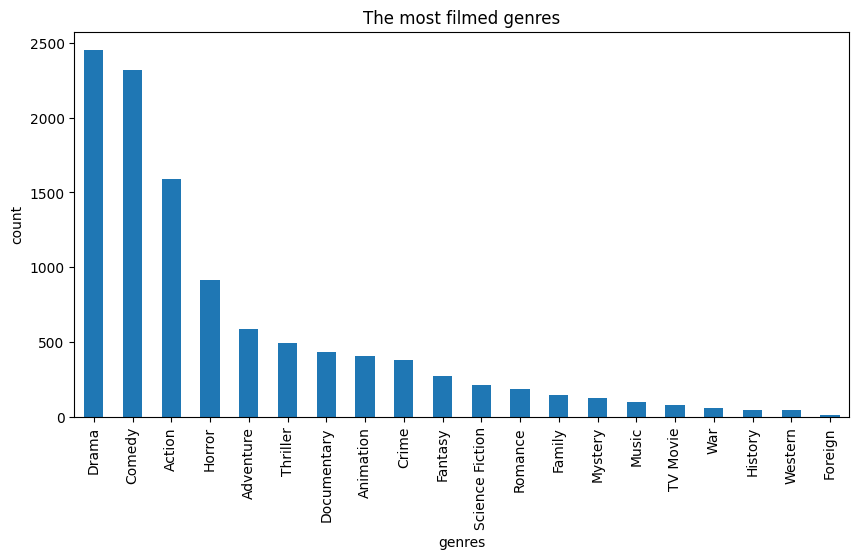

In [35]:
# visualising genres distribustion
fig = plt.figure(figsize=(10,5))
movie_list['genres'].value_counts().plot(kind='bar')
plt.title('The most filmed genres')
plt.xlabel('genres')
plt.ylabel('count')
plt.show()

In [36]:
movie_list['genres'].describe()

count     10839
unique       20
top       Drama
freq       2453
Name: genres, dtype: object

We can see that `Drama`,`Comedy`,and `Action` are the top three filmed genres in our dataset, and `Drama` genre is 22.6% of the dataset.

Q3: Is there any correlation between a movie budget and its revenue?

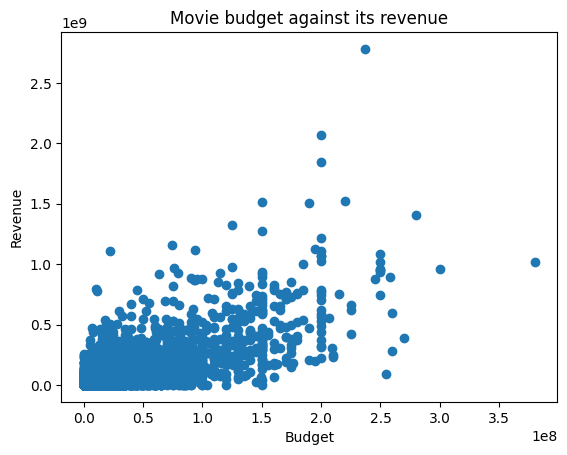

In [38]:
# Plotting budget against revenue
plt.scatter(movie_list['budget'],movie_list['revenue'])
plt.title('Movie budget against its revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

We can notice positive correlation between `Budget` and `Revenue`, indicating a relation between them with little outliers.